## Iskanje strukture v podatkih

Podatkovno rudarjenje, naloga, 13. april 2025
**Gašper Dobrovoljc**

Z modeliranjem skušamo poiskati strukturo v podatkih. Z metodami nenadzorovanga modeliranja skušamo poiskati skupine podobnih podatkov oz. skupine primerov.

V nalogi boste uporabili modeliranje verjetnostnih porazdelitev za iskanje osamelcev ter metode za iskanje skupin podobnih primerov (gručenje).

### Podatki

Opis podatkovne zbirke MovieLens ostaja enak prvi nalogi.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ratings = pd.read_csv('./podatki/ml-latest-small/ratings.csv')
movies = pd.read_csv('./podatki/ml-latest-small/movies.csv')

ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

### Vprašanja

Z uporabo principov, ki ste jih spoznali na vajah in predavanjih, odgovorite na
spodnja vprašanja. Pri vsakem vprašanju dobro premislite, na kakšen način boste
najbolje podali, prikazali oz. utemeljili odgovor. Bistven del so odgovori na
vprašanja in ne toliko implementacija vaše rešitve.

#### 1. Iskanje osamelcev (50%) 
O ocenah katerih filmov so si uporabniki najmanj enotni? Povedano drugače, za katere filme so pripadajoče ocene najbolj razpršene?

Formuliraj problem kot modeliranje verjetnostne porazdelitve. Premisli o naslednjih vprašanjih, naredi ustrezne poizkuse in odgovori.

In [2]:
ratings_agg = ratings.groupby('movieId')['rating'].agg(['count', 'var'])
ratings_agg = ratings_agg[ratings_agg['count'] >= 5]

ratings_agg.merge(movies, on='movieId').sort_values(by='var', ascending=False)

movieId  count       var  \
2042     3973      5  4.550000   
1305     2365      5  4.200000   
1428     2570      5  3.500000   
2515     6535      6  3.366667   
1993     3813      6  3.366667   
...       ...    ...       ...   
2167     4356      6  0.041667   
239       346      6  0.000000   
1348     2417      5  0.000000   
1510     2749      5  0.000000   
483       829      7  0.000000   

                                                  title  \
2042              Book of Shadows: Blair Witch 2 (2000)   
1305  King Kong vs. Godzilla (Kingukongu tai Gojira)...   
1428                         Walk on the Moon, A (1999)   
2515       Legally Blonde 2: Red, White & Blonde (2003)   
1993                                   Interiors (1978)   
...                                                 ...   
2167                    Gentlemen Prefer Blondes (1953)   
239                                     Backbeat (1993)   
1348                                   Heartburn (1986)   
1510                          Morning After, The (1986)   
483                              Joe's Apartment (1996)   

                             genres  
2042  Crime|Horror|Mystery|Thriller  
1305                  Action|Sci-Fi  
1428                  Drama|Romance  
2515                         Comedy  
1993                          Drama  
...                             ...  
2167         Comedy|Musical|Romance  
239                   Drama|Musical  
1348                   Comedy|Drama  
1510                  Drama|Mystery  
483          Comedy|Fantasy|Musical  

[3496 rows x 5 columns]


Odgovor: **Za izračun razpršenosti ocen za določen film lahko uporabimo varianco.**

#### 1.1. vprašanje:

Katera je ustrezna naključna spremenljivka (količina) v podatkih, ki odgovarja na vprašanje?

Odgovor: **Ustrezna naključna spremenljivka je varianca ocen filma.**

#### 1.2. vprašanje:
Nariši njeno porazdelitev, npr., s pomočjo histograma.

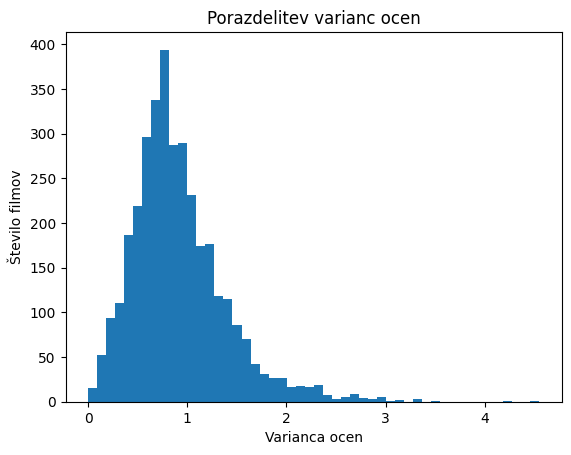

In [3]:
ratings_agg['var'].plot.hist(bins=50)
plt.title('Porazdelitev varianc ocen')
plt.xlabel('Varianca ocen')
plt.ylabel('Število filmov')
plt.show()

#### 1.3. vprašanje:

Ali porazdelitev spominja na kakšno znano porazdelitev? Ali je porazdelitev morda normalna ali katera druga?

Odgovor: **Porazdelitev ni normalna, spominja na beta porazdelitev.**

#### 1.4. vprašanje:

Oceni parametre te porazdelitve s pomočjo postopkov, ki smo jih spoznali na vajah.  Izmed porazdelitev, ki smo jih spoznali na vajah, izberi tisto, ki se podatkom najbolj prilega.        

beta: a = 2.9284, b = 12.9440


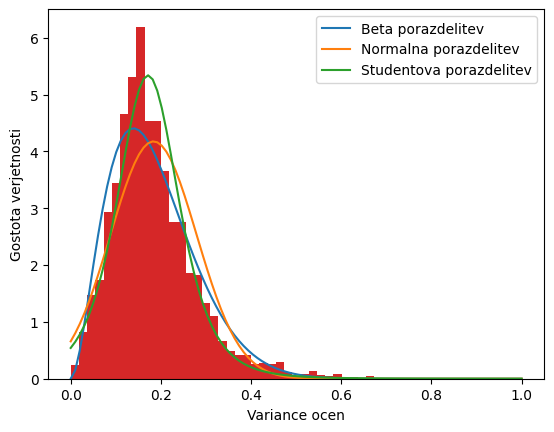

In [4]:
from scipy.stats import beta, norm, t
epsilon = 1e-4

normalized = np.clip(ratings_agg['var'] / 5.0, epsilon, 1 - epsilon)
interval = np.linspace(0, 1, 100)

a, b, loc, scale = beta.fit(normalized, floc=0, fscale=1)
beta_pdf = beta.pdf(interval, a, b, loc=loc, scale=scale)
plt.plot(interval, beta_pdf, label='Beta porazdelitev')
print(f"beta: a = {a:.4f}, b = {b:.4f}")

mean, std_dev = norm.fit(normalized)
norm_pdf = norm.pdf(interval, mean, std_dev)
plt.plot(interval, norm_pdf, label='Normalna porazdelitev')

df, loc, scale = t.fit(normalized)
t_pdf = t.pdf(interval, df, loc=loc, scale=scale)
plt.plot(interval, t_pdf, label='Studentova porazdelitev')

normalized.plot.hist(bins=50, density=True, label='')
plt.xlabel('Variance ocen')
plt.ylabel('Gostota verjetnosti')
plt.legend()
plt.show()

Odgovor: **Od porazdelitev, ki smo jih spoznali na vajah, se najbolj prilega beta porazdelitev.**

#### 1.5. vprašanje:

Izpiši filme z vrednostjo naključne spremenljivke, ki spada v zgornjih 5% statistično značilnih primerov. 

In [5]:
threshold = ratings_agg['var'].quantile(0.95)

ratings_agg[ratings_agg['var'] >= threshold].sort_values('var', ascending=False).merge(movies, on='movieId')

movieId  count       var  \
0       3973      5  4.550000   
1       2365      5  4.200000   
2       2570      5  3.500000   
3       3813      6  3.366667   
4       6535      6  3.366667   
..       ...    ...       ...   
172     1241     11  1.800000   
173     5530      6  1.800000   
174     3678      5  1.800000   
175    32596      5  1.800000   
176     5108      5  1.800000   

                                                 title  \
0                Book of Shadows: Blair Witch 2 (2000)   
1    King Kong vs. Godzilla (Kingukongu tai Gojira)...   
2                           Walk on the Moon, A (1999)   
3                                     Interiors (1978)   
4         Legally Blonde 2: Red, White & Blonde (2003)   
..                                                 ...   
172                      Dead Alive (Braindead) (1992)   
173                             Simone (S1m0ne) (2002)   
174                Man with the Golden Arm, The (1955)   
175                                      Sahara (2005)   
176                                      John Q (2002)   

                            genres  
0    Crime|Horror|Mystery|Thriller  
1                    Action|Sci-Fi  
2                    Drama|Romance  
3                            Drama  
4                           Comedy  
..                             ...  
172          Comedy|Fantasy|Horror  
173    Comedy|Drama|Fantasy|Sci-Fi  
174                          Drama  
175        Action|Adventure|Comedy  
176           Crime|Drama|Thriller  

[177 rows x 5 columns]

Odgovor: **Filme, ki so v zgornjih 5% značilnih primerov lahko najdemo z izračunom standardnega odklona ocene za vsak film. Nato izračunamo 95% mejo in filtriramo filme po njej.**

#### 2. Gručenje filmov (50%)

Priporočilni sistemi pogosto odkrivajo skupine predmetov (v našem primeru filme), za katere velja visoka medsebojna podobnost.

Poiščite 100 najbolj gledanih filmov. Ali med njimi obstajajo skupine?
Uporabite ustrezen algoritem za gručenje. Na film lahko gledamo kot vektor, kjer je  
število komponent enako številu uporabnikov. 

Vektorji vsebujejo tudi *neznane vrednosti*.
Primer vektorjev za deset filmov prikazuje spodnja tabela.

Algoritme gručenja lahko izvajamo v izvornem prostoru (koordinatni sistem filmi-uporabniki) ali pa filme primerjamo z merami podobnosti, ki smo jih spoznali na vajah. 
Premisli, kateri način je primernejši glede na obliko podatkov.

| x          |Movie                                      | $u_0$ |$u_1$ | $u_2$ | $\cdots$ |
|------------|-------------------------------------------|:-----:|:----:|:------|:--------:|
|$\vec{x_0}$ | Fight Club (1999)                         | ?     | ?    | ?     | $\cdots$ |
|$\vec{x_1}$ | Twelve Monkeys (a.k.a. 12 Monkeys) (1995) | ?     | ?    | 2.5   | $\cdots$ |
|$\vec{x_2}$ | Independence Day (a.k.a. ID4) (1996)      | ?     | ?    | ?     | $\cdots$ |
|$\vec{x_3}$ | Dances with  Wolves (1990)                | 4.0   | ?    | ?     | $\cdots$ |
|$\vec{x_4}$ | Fargo (1996)                              | ?     | ?    | ?     | $\cdots$ |
|$\vec{x_5}$ | Speed (1994)                              | ?     | ?    | ?     | $\cdots$ |
|$\vec{x_6}$ | Apollo 13 (1995)                          | ?     | 2.0  | ?     | $\cdots$ |
|$\vec{x_7}$ | Seven (a.k.a. Se7en) (1995)               | ?     | ?    | ?     | $\cdots$ |
|$\vec{x_8}$ | Sixth Sense, The (1999)                   | 3.0   | ?    | 4.0   | $\cdots$ |
|$\vec{x_9}$ | Aladdin (1992)                            | ?     | ?    | ?     | $\cdots$ |
|$\cdots$    | $\cdots$                                  | $\cdots$ | $\cdots$  | $\cdots$ | $\cdots$ |

Pri tem odgovori na naslednja vprašanja.

#### 2.1. vprašanje:

Utemelji izbiro algoritma in mere podobnosti.

Odgovor: **Za gručenje bi bil najbolj primeren algoritem hierarhično gručenje. Zaradi mankajočih podatkov se za mero podrobnosti uporabi Jaccardov index.**

#### 2.2. vprašanje:

Koliko skupin filmov je med izbranimi? Ali poznamo kvantitativne ocene za različne možnosti razvrščanja v skupine?

Odgovor: **Med izbranimi filmi je 14 skupin. Poznamo koeficient silhuete in mero skupne deljene informacije.**

#### 2.3. vprašanje:

Prikaži rezultate z uporabo ustrezne vizualizacije.

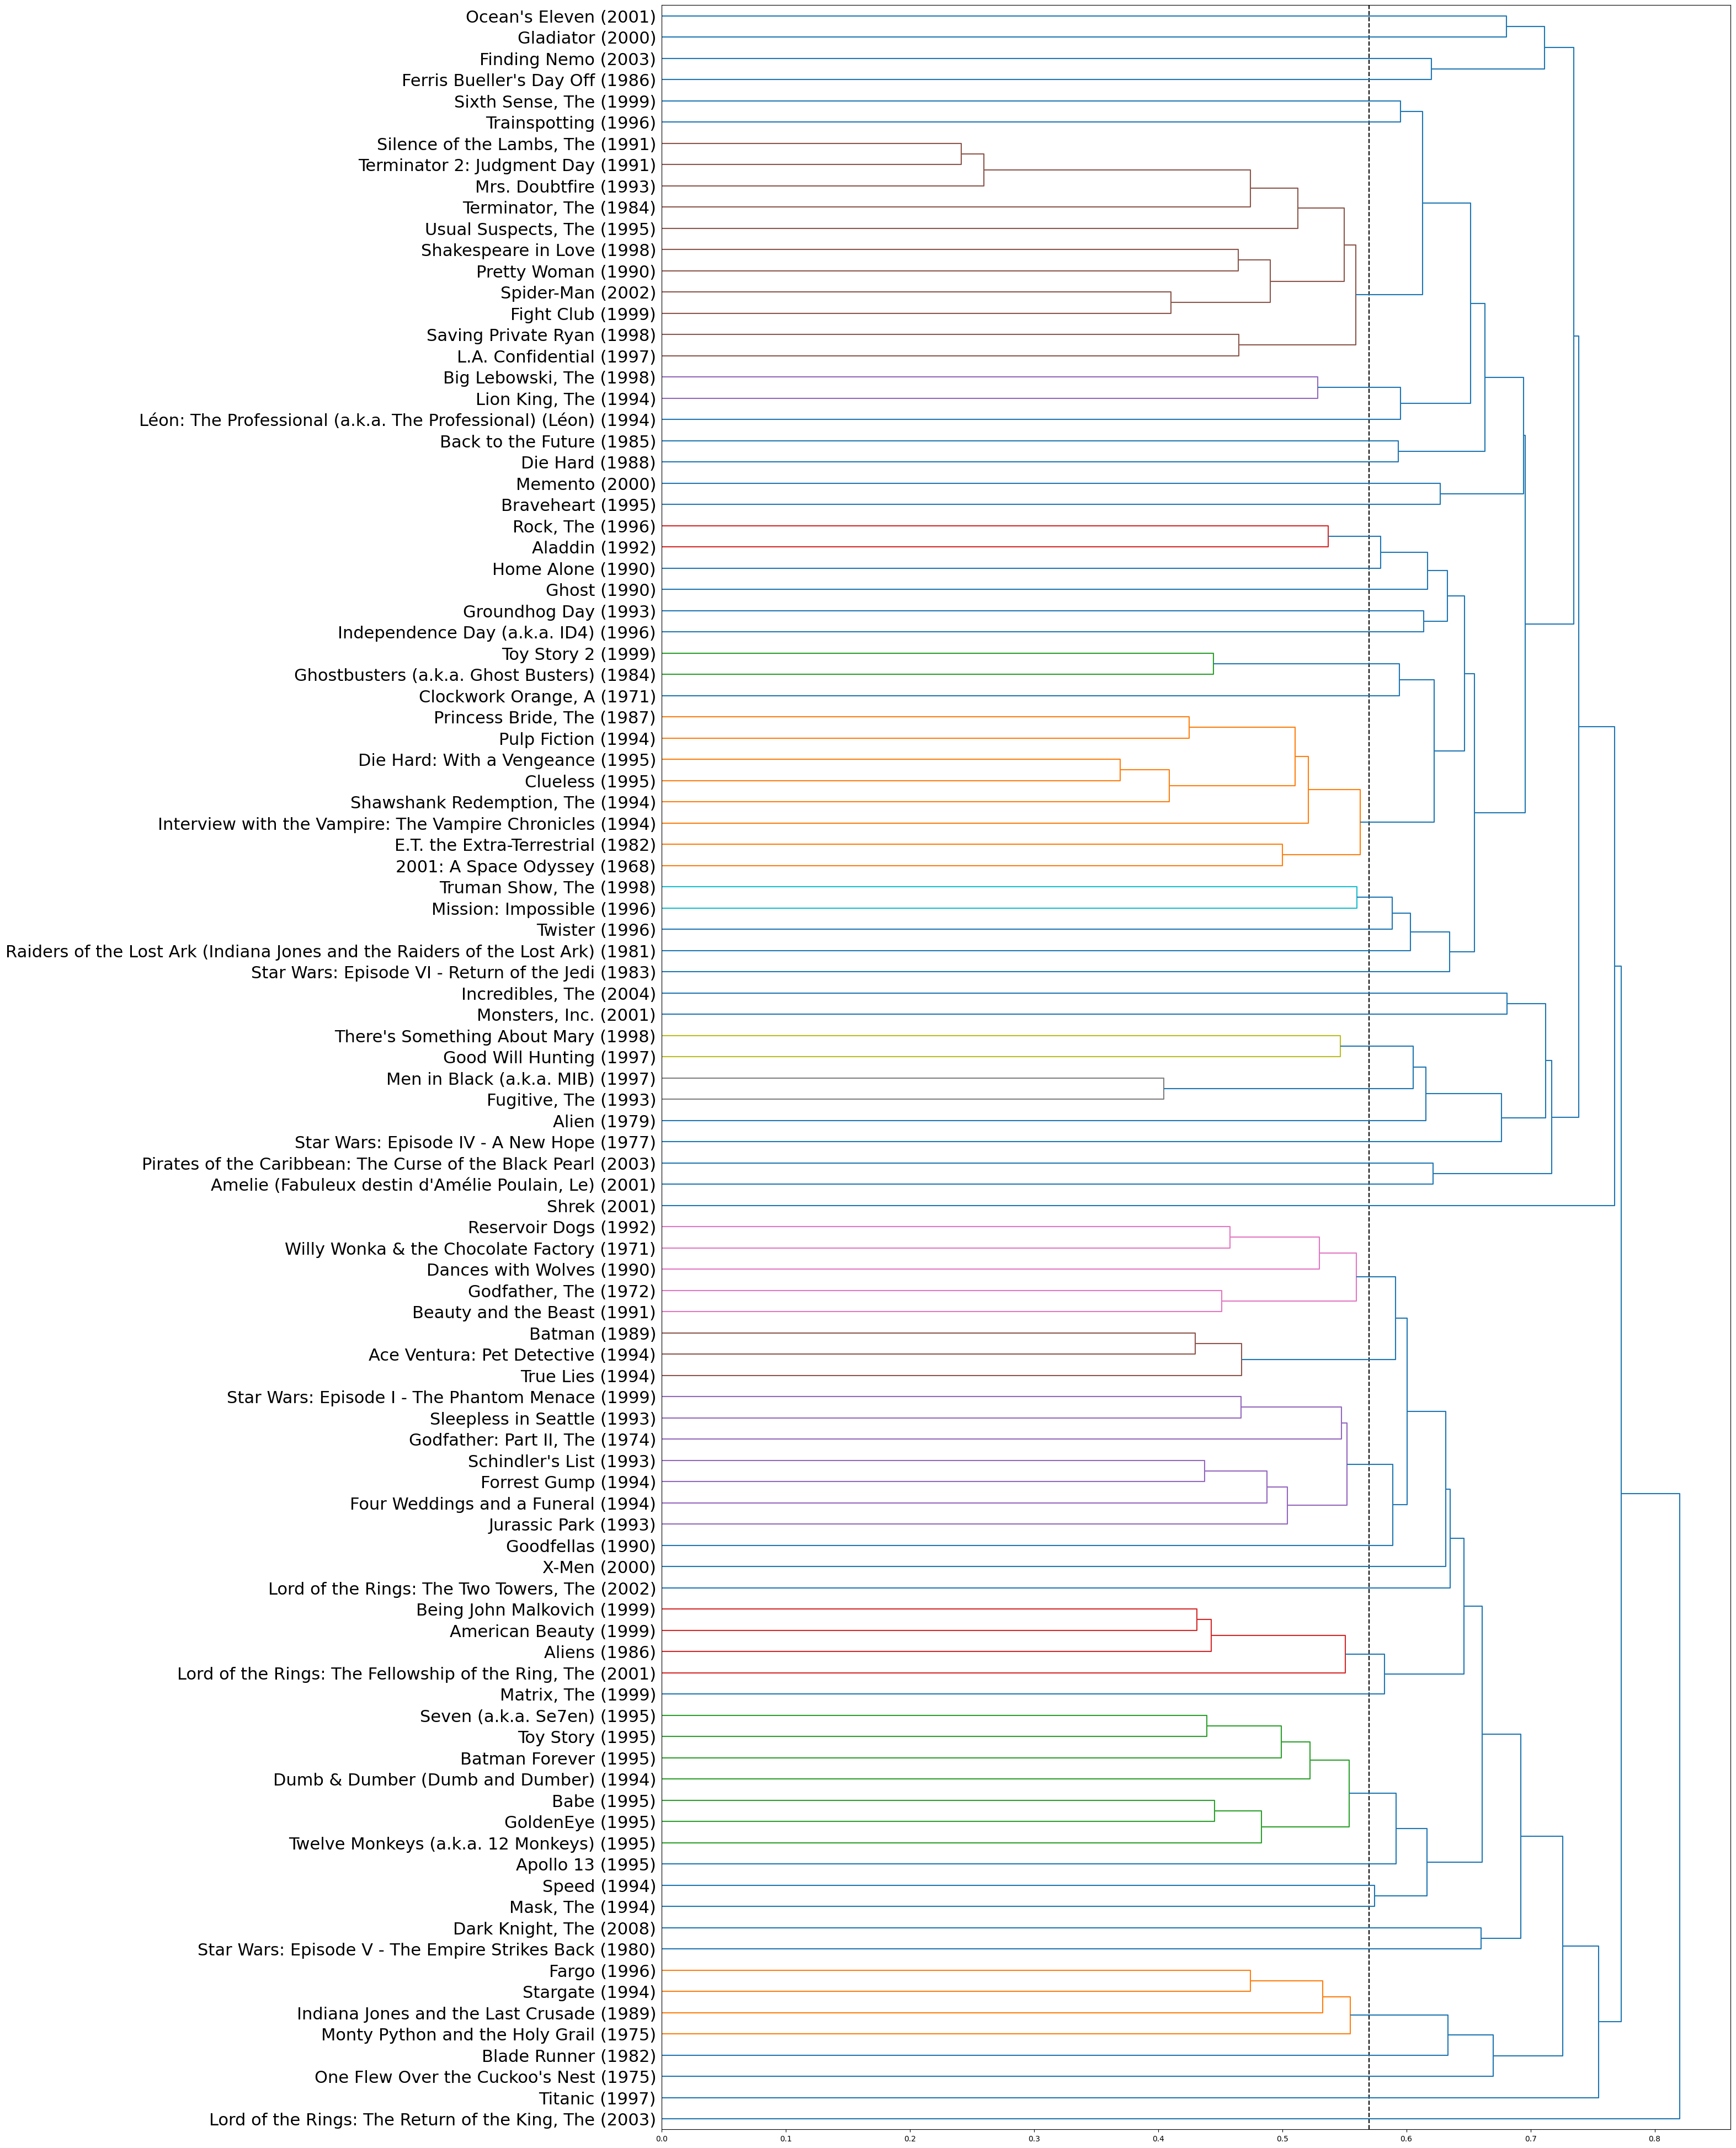

In [6]:
import scipy.cluster.hierarchy as hr

top_100 = ratings.groupby(['movieId'])["rating"].size().sort_values(ascending=False).head(100)

matrix = ratings.pivot(index='movieId', columns='userId', values='rating')

linkage = hr.linkage(matrix.loc[top_100.index].notna().astype(bool), method='average', metric='jaccard')

labels = movies.loc[movies['movieId'].isin(top_100.index), 'title'].tolist()
plt.figure(figsize=(25, 50))
plt.axvline(x=0.57, color='k', linestyle='--')
hr.dendrogram(linkage, labels=labels, leaf_font_size=22, orientation='right')
plt.show()

#### 2.4. vprašanje:

Komentiraj smiselnost dobljenih rezultatov.

Odgovor: **Dobljeni rezultati niso smiselni. Kažejo, da podatki o ogledih filmov niso podobni za podobne filme (pričakovali bi, da se filmi grupirajo recimo po žanrih)**